In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
board_games = pd.read_csv('board_games.csv')

In [26]:
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [27]:
board_games.dropna(inplace=True)

In [28]:
board_games = board_games[board_games.users_rated > 0]

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

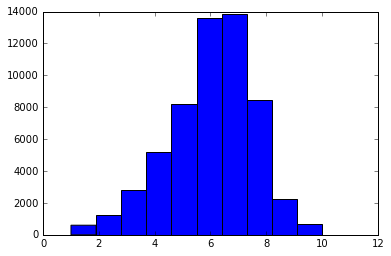

In [29]:
plt.hist(board_games.average_rating)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff1dd1319e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff1dd139c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1dd143c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1dd13ecc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff1dd131b70>,
  <matplotlib.lines.Line2D at 0x7ff1dd139b38>]}

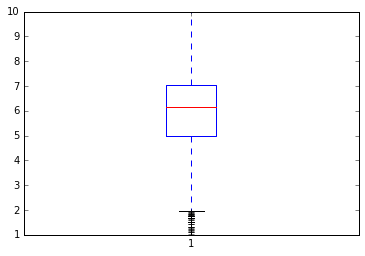

In [30]:
plt.boxplot(board_games.average_rating)

In [31]:
board_games.average_rating.std()

1.5788299348332961

In [32]:
board_games.average_rating.mean()

6.0161128493338492

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
numeric = board_games.drop('name', axis=1).drop('type',axis=1).drop('id', axis=1)

In [34]:
kmeans.fit(numeric )

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [35]:
import numpy as np
game_mean = numeric.apply(np.mean, axis=1)
game_std = numeric.apply(np.std, axis=1)

In [36]:
labels = kmeans.labels_

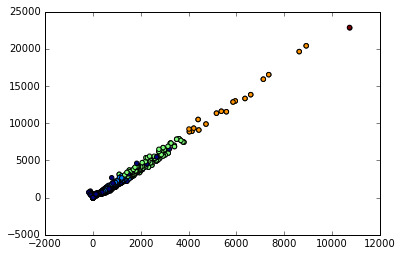

In [37]:
plt.scatter(game_mean, game_std, c=labels)

In [38]:
correlations = numeric.corr()

In [39]:
correlations.average_rating

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
numeric = numeric.drop('average_rating',axis=1)
numeric = numeric.drop('bayes_average_rating',axis=1)
lr.fit(numeric, board_games["average_rating"])
predictions = lr.predict(numeric)

numpy.mean((predictions - board_games["average_rating"]) ** 2)

2.0933969758339361